***

<b> <u> <center>
    Machine Learning <br>
    A3: Timed Unsupervised Learning Project(Team)</u>
</b>

  <center>  Cohort : 3 (Castro)
    <center> Team : 2      
        <center> Jianing Li | Manoj Vasudha Shivaani LNU | Neelkumar Patel | Pedro Nascimento | Revanth Varma Dandu
    
***

<h3>Part I: Introduction</h3><br>

<b> <u> <center>Goal of the assignment<br> </u> </b>
<center> The goal of the assignment is to develop a marketing strategy for Microsoft to determine purchasing behavior of consumers after analyzing survey data containing demographics as well as psychometric factors such as the Big 5 and HULT DNA.
<br>
    <br>
<center> The objective is to perform market segmentation, quantify market size and outline major persona/characteristics for each market segment. 
<br>
    <br>
<center> We will also outline to Microsoft what is the market for PCs by identifying the characteristics that best lead to this purchasing behavior and then recommending strategies to appeal this market.

<b> <u> <center>Case Information  (Source:<a href="https://mycourses.hult.edu/courses/2594674/assignments/24815305"> click here</a>)
    <br>  </b>
<b> <u> <center>Windows or Mac?<br> </u> </b>
<center>
Countless consumers have pondered this question when preparing to buy a new computer. As a result, Apple (AAPL) and Microsoft (MSFT) have been rigorously researching several aspects of consumer buying behavior in regards to the decision making behind this question. Both firms have commissioned research and analysis teams to study aspects such as system architecture, security, and overall performance.
<br>
    <br>
 <center>
Recently, Microsoft has decided to approach this question from the perspective of the Big Five personality traits as well as the Hult DNA. As such, your team has been commissioned to run an analysis on these factors. Microsoft is looking forward to receiving your key insights, as well as an organized Jupyter Notebook that can be shared with their internal analytical teams. They also have sent you a kind reminder to utilize external research to support your findings and to give details related to important information such as audience size.
     
***

<b> <u> <center> Hypothesis <br> </u> </b>
    <center>
        <br>
        The Big 5 personality types and Hult DNA have a relationship with laptop purchasing behavior.
   
   
***    

<b> <u> <center> Prediction <br> </u> </b>
    <center>
        <br>
        High openness to experience (Big 5) will be the most important personality type when determining which laptop to buy. The reason for this is because most survey respondents are international student’s at Hult, who by logic should be open to new experiences. 
        <br>
        <br>
Dynamic thinking will be the most influential HULT DNA trait to determine buying behavior because these are university students who are successful academically and professionally.
   
   
***    

<h3>Part II: Fundamental Dataset Exploration</h3><br>
<h4> Importing Dataset and libraries </h4><br>
    Here we're importing the necessary datasets and libraries required for the analysis. Then we are importing the data recorded from the Survey into Python dataset and reading it.

In [1]:
##############################################################################
# Import Packages and Libraries
##############################################################################
# Importing libraries

import pandas as pd                        # data science essentials
import numpy as np                         # fundamental package in python
import seaborn as sns                      # enhanced graphical output
import matplotlib.pyplot as plt            # essential graphical output
import warnings as w
w. filterwarnings("ignore")

# Importing packages

from sklearn.preprocessing import StandardScaler           # standard scaler
from sklearn.decomposition import PCA                      # pca
from sklearn.preprocessing import normalize                # normalize
from sklearn.cluster import KMeans                         # k-means clustering
from scipy.cluster.hierarchy import dendrogram, linkage    # dendrograms

<h4> Importing file and loading the Data </h4>

In [2]:
# Setting print options

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

##############################################################################
# Importing file and loading the Data
##############################################################################

# specifying and reading the excel into Python
X = pd.read_excel('Survey_Data_Final_Exam.xlsx')

<h4> Defining Inertia and Scree plots </h4>
<br>
Here we are defining the inertia plots and scree plots. The inertia plots is a method to measure the cluster quality and scree plots is a plot of eigenvalues against the number of components in order of extraction. It helps us to find the number of components for further analysis.

In [3]:
##############################################################################
# Inertia plots
##############################################################################
def interia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()


##############################################################################
# scree_plot
##############################################################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

***

<h3>Part III: Explanatory Data Analysis</h3><br>

In [4]:
X.shape

(392, 79)

Currently in the dataset we have 392 observations for 79 variables.

We have 72 numeric variables and 7 descriptive variables. 

We further explored the first 5 observations of the dataset using X.head. We further examined the summary statistics using X.describe. 


<h4> Creating a list based on the personality type </h4>
    
Looking at the questions we can see that the questions depict the major dimensions of the 'Big 5 personality' (Source:<a href="http://www.sjdm.org/dmidi/NEO-FFI.html"> click here</a>) types including Openness, Conscientiousness, Agreeableness, Extraversion, and Neuroticism.
<br>

<br>
We are breaking-down every 5th question and create a list in the following order:
1. Extraversion
2. Agreeableness
3. Conscientiousness
4. Neuroticism
5. Openness

(Source - Costa, P.T. & McCrae, R.R. (1992). Revised NEO Personality Inventory (NEO-PI-R) and NEO Five Factor Model (NEO-FFI) professional manual. Odessa, FL: Psychological Assessment Resources.)

In [5]:
# Creating lists basedon the personality types

# All Extraversion Categories
(X[X.columns[::5]]).columns 
Y = X.iloc[:,1 :]

# All Agreeableness Categories
(Y[Y.columns[::5]]).columns 
Y2 = Y.iloc[:,1:]

# All conscientiousness Categories
(Y2[Y2.columns[::5]]).columns 
Y3 = Y2.iloc[:,1:]

# All Neuroticism Categories
(Y3[Y3.columns[::5]]).columns 
Y4 = Y3.iloc[:,1:]

# All Openness Categories
(Y4[Y4.columns[::5]]).columns 

Index(['Get stressed out easily', 'Am relaxed most of the time', 'Worry about things', 'Seldom feel blue', 'Am easily disturbed', 'Get upset easily', 'Change my mood a lot', 'Have frequent mood swings', 'Get irritated easily', 'Often feel blue', 'Display a growth mindset', 'Take initiative even when circumstances, objectives, or rules aren't clear.1', 'Work well with people from diverse cultural backgrounds', 'Seek and use feedback from teammates', 'What program are you in?'], dtype='object')

<h4> Allocating scores based on the personality types </h4>

Using the list of questions pertaining to each personality type, we are summing the scores for each question in that category. Then we are creating a new column containing the aggregate score for that personality type. (Source:<a href="https://openpsychometrics.org/printable/big-five-personality-test.pdf"> click here</a>)


In [6]:
# Using the list of personality types, we are allocating scores           

#Extraversion Categories
X['Extraversion Score'] = X.apply(lambda row: 20+row["Am the life of the party"] -
row["Don't talk a lot"] +
row["Feel comfortable around people"] -
row["Keep in the background"] +
row["Start conversations"] -
row["Have little to say"] +
row["Talk to a lot of different people at parties"] -
row["Don't like to draw attention to myself"] +
row["Don't mind being the center of attention"] -
row["Am quiet around strangers"], axis=1)

#Agreeableness Categories
X['Agreeableness Score'] = X.apply(lambda row: 14-row["Feel little concern for others"] +
row["Am interested in people"] -
row["Insult people"] +
row["Sympathize with others' feelings"] -
row["Am not interested in other people's problems"] +
row["Have a soft heart"] -
row["Am not really interested in others"] +
row["Take time out for others"] -
row["Feel others' emotions"] +
row["Make people feel at ease"], axis=1)

#conscientiousness Categories
X['Conscientiousness Score'] = X.apply(lambda row: 14+row["Am always prepared"] -
row["Leave my belongings around"] +
row["Pay attention to details"] -
row["Make a mess of things"] +
row["Get chores done right away"] -
row["Often forget to put things back in their proper place"] +
row["Like order"] -
row["Shirk my duties"] +
row["Follow a schedule"] -
row["Am exacting in my work"], axis=1)

#Neuroticism SCORES
X['Neuroticism Score'] = X.apply(lambda row: 38-row["Get stressed out easily"] +
row["Am relaxed most of the time"] -
row["Worry about things"] +
row["Seldom feel blue"] -
row["Am easily disturbed"] +
row["Get upset easily"] -
row["Change my mood a lot"] +
row["Have frequent mood swings"] -
row["Get irritated easily"] +
row["Often feel blue"], axis=1)

#OPENNESS
X['Openness Score'] = X.apply(lambda row: 8+row["Have a rich vocabulary"] -
row["Have difficulty understanding abstract ideas"] +
row["Have a vivid imagination"] -
row["Am not interested in abstract ideas"] +
row["Have excellent ideas"] -
row["Do not have a good imagination"] +
row["Am quick to understand things"] -
row["Use difficult words"] +
row["Spend time reflecting on things"] -
row["Am full of ideas"], axis=1)


<h4> Distribution of Big 5 traits among Hult students

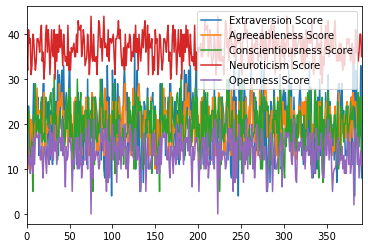

In [7]:
lst= ['Extraversion Score', 'Agreeableness Score', 'Conscientiousness Score',
      'Neuroticism Score', 'Openness Score']
fig, ax = plt.subplots(1,1)
for s in lst:
    X[s].plot()
    plt.legend()
    fig.show()

Note: It is surprising to see that Hult students score on an average high on Neuroticism and low on openness to experience. 

<h4> Reverse coding negative question </h4>

Here we are checking the data quality by trying to reverse code the key of negatively phrased questions so that we can bring them to the same scale as their positive counterparts. This will help us to be able to analyze the questions with the same perspective, avoiding biases.

In [8]:
#DATA QUALITY 

neg=['Feel little concern for others',
'Get stressed out easily',
'Don\'t talk a lot',
'Leave my belongings around',
'Have difficulty understanding abstract ideas',
'Insult people',
'Worry about things',
'Keep in the background',
'Make a mess of things',
'Often feel blue',
'Am not interested in abstract ideas',
'Am not interested in other people\'s problems',
'Am easily disturbed',
'Have little to say',
'Often forget to put things back in their proper place',
'Get upset easily',
'Do not have a good imagination',
'Am not really interested in others',
'Change my mood a lot',
'Don\'t like to draw attention to myself',
'Shirk my duties',
'Have frequent mood swings',
'Use difficult words',
'Get irritated easily',
'Am quiet around strangers',
'Am exacting in my work',
'Don\'t  generate ideas that are new and different',
'Don\'t persuasively sell a vision or idea',
'Can\'t rally people on the team around a common goal']


X_new= X.copy()

for col in  X[neg]:
    for i in range(len(X[col])):
        if X[col][i] == 1:
            X_new[col][i] = 5
        elif X[col][i]== 2:
            X_new[col][i] = 4
        elif X[col][i]== 4:
            X_new[col][i] = 2
        elif X[col][i]== 5:
            X_new[col][i] = 1            


In [9]:
# Replacing the flipped questions in the original dataframe
X= X_new

<h4> Flagging discrepancy responses </h4>

We are looking for people who might have not contributed fruitfully to the survey. The discrepancy might be that people might have skimmed through the questionnaire and might not have given legitimate answers. We have identified 10 pairs of questions that can help us to flag people. These people would not be considered for our further analysis if they have discrepancy in more than 7 questions. In other words we have, set 80% as the similarity index for our survey beyond which we consider it to be a flag and we will not consider their response for our further analysis. 


In [10]:
#Flagging descrepancy responses

X['con1'] = np.where((X['Seldom feel blue'] != X['Often feel blue'])
                     , 1, 0)
X['con2'] = np.where((X['Do not have a good imagination'] != X['Have a vivid imagination'])
                     , 1, 0)

                    
X['con3'] = np.where((X['Keep in the background'] != X['Don\'t mind being the center of attention'])
                     , 1, 0)

                    
X['con4'] = np.where((X['Leave my belongings around'] != X['Often forget to put things back in their proper place'])
                     , 1, 0)

                    
X['con5'] = np.where((X['Have little to say'] != X['Don\'t talk a lot'])
                     , 1, 0)

X['con6'] = np.where((X['Have frequent mood swings'] != X['Change my mood a lot'])
                     , 1, 0)

X['con7'] = np.where((X['Don\'t mind being the center of attention'] != X['Don\'t like to draw attention to myself'])
                     , 1, 0)


X['con8'] = np.where((X['Get stressed out easily'] != X['Am relaxed most of the time'])
                     , 1, 0)

X['con9'] = np.where((X['Am full of ideas'] != X['Have excellent ideas'])
                     , 1, 0)

X['con10'] = np.where((X['Make people feel at ease'] != X['Insult people'])
                     , 1, 0)

####################################


X['con11'] = X.apply(lambda row: row['con1'] +
row['con2']+row['con3']+row['con4']+row['con5']+row['con6']+row['con7']+row['con8']+row['con9']+row['con10'], axis=1) 


X['con12'] = np.where((X['con11'] >= 8)
                     , 1, 0)

In [11]:
X['con12'].sum()

57

In [12]:
X['con12'].sum()/len(X)

0.14540816326530612

In [13]:
X = X[X['con12'] == 0]


In [14]:
# Making a copy of the dataframe X

X_copy = X.copy()

We have 2 kinds of information in our Dataset, demographic and behavioral.
For PCA to be effective, we exclude all demographic information i.e (
1. 'What laptop do you currently have?', 
2. 'What laptop would you buy in next assuming if all laptops cost the same?', 
3. 'What program are you in?', 
4. 'What is your age?', 
5. 'Gender',
6. 'What is your nationality? ',
7. 'What is your ethnicity?'
) 
and consider only the variable that relate to Big 5 traits and Hult DNA.

In [15]:
X = X.iloc[:,1 :72] 

***

<h3> Part IV: Principal Component Analysis </h3>
1. Scaling the data
<br>
<br>
2. Applying PCA
<br>
<br>
3. Inspect the explained variance ratio per component
<br>

Note: We have questions from both the Big 5 (Source:<a href="https://openpsychometrics.org/printable/big-five-personality-test.pdf"> click here</a>) and Hult DNA (Source:<a href="https://www.hult.edu/blog/why-every-leader-needs-growth-mindset/"> click here</a>) questionnaire. So we initially ran the initial PCA without any constraints on the number of components. 
Subsequently a scree plot was plotted to obtain the optimal number of components. As the elbow of the scree plot was observed at 7 components. <br>
<br>
Beyond this elbow point due to the law of marginal diminishing returns, with every increase in principal component we get less and less variance preserved. For this reason we want to get the minimum number of components that preserves the maximum variance in the data. <br>
<br>
All further analysis has been conducted with the number of components =7. 


<h4> Scaling the data

In [16]:
# Scale the data

scaler = StandardScaler()

scaler.fit(X)

X_std_1 = scaler.transform(X)

X_std_1 = pd.DataFrame(X_std_1)


<h4> Brief introduction to PCA </h4>
<br>
PCA is a dimensionality reduction technique, which is often used in multi variate analysis. 
<br>
In questionnaire analysis it is often used to unravel the construct measured by combination of different variables. 
In the present analysis we attempt to understand the behavioral traits and characteristics intended to be measured by the Big 5 Questionnaire <source> and the Hult DNA Questionnaire. 

In [17]:
# Apply PCA
pca = PCA(n_components = 7)
pca.fit(X_std_1)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [18]:
#print(pd.np.var(X), '\n\n') #Looking at variance pre scaling
#print(pd.np.var(X_std_1)) #post scaling

Note: We examined the pre and post-scaling variance and as intended the post scaling variance was 1 for each of the variables. 

In [19]:
# Renaming the columns of X_std_1

X_std_1.columns = X.columns

<h4> Inspect the explained variance ratio per component 

In [20]:
# Inspect the explained variance ratio per component
print(pca.explained_variance_ratio_)


[0.16431045 0.06519081 0.05807456 0.05219781 0.04103894 0.03809624
 0.02807343]


Note: The output explains the percentage variance preserved by each of the 7 components. 
For example, component 1 explains 16.4% of the total variance.

In [21]:
print(sum(pca.explained_variance_ratio_))

0.4469822318373973


Note: The total variance preserved by the 7 components all-together is 44.69%

<h4> INSTANTIATING a PCA object with no limit to principal components

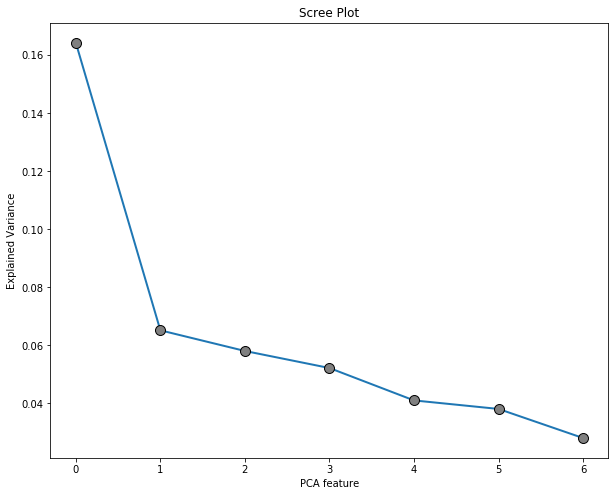

In [22]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = 7, random_state = 802) #No limit on PCA 

# FITTING and TRANSFORMING the scaled data
trait_pca = pca.fit_transform(X_std_1)

# calling the scree_plot function
scree_plot(pca_object = pca)

trait_pca_7 = pd.DataFrame(trait_pca)


Note: This is a reduced scree plot with the first 7 principal components.

<h4> Creating new columns based on PCA </h4>

Here we are creating new columns based on the PCA cluster analysis, where we are clustering the columns that have similar traits. The columns have been names based on the following categories:

1. Anxious: This is a category we defines for people who according to us are over-achievers and have high values on columns - am exacting in my work; use difficult words; worry about things.
<br>
<br>
2. Rapporteurs: This is the category of people who we think are empathetic leaders. These category of people having values on columns - have a vivid imagination; coach teammates for performance and growth; feel others' emotions; sympathize with others' feelings; take initiative even when circumstances, objectives, or rules aren't clear; spend time reflecting on things; listen carefully to others; am full of ideas; have a soft heart; drive for results; take time out for others; do not have a good imagination; resolve conflicts constructively; take initiative even when circumstances, objectives, or rules aren't clear.1; seek and use feedback from teammates; translate ideas into plans that are organized and realistic; effectively negotiate interests, resources, and roles.
<br>
<br>
3. Neuroticist thinkers: This is a category of people who are the diplomats or mediators and have high values in the columns of - often forget to put things back in their proper place; pay attention to details; listen carefully to others; leave my belongings around; make a mess of things; insult people; have frequent mood swings; change my mood a lot; work well with people from diverse cultural backgrounds; get upset easily; see underlying patterns in complex situations; like order; follow a schedule; spend time reflecting on things; use difficult words; shirk my duties; translate ideas into plans that are organized and realistic; get stressed out easily; get irritated easily; am easily disturbed.
<br>
<br>
4. Socialite: This category of people are the extrovert communicators and have high values in the columns of - am interested in people; have a soft heart; listen carefully to others; use difficult words; sympathize with others' feelings; am not really interested in others; feel others' emotions; feel comfortable around people; make people feel at ease; am not interested in other people's problems; get irritated easily; take time out for others; build cooperative relationships; seek and use feedback from teammates; start conversations; get upset easily; resolve conflicts constructively; work well with people from diverse cultural backgrounds; am relaxed most of the time; talk to a lot of different people at parties; Insult people; am exacting in my work; am the life of the party; get stressed out easily.
<br>
<br>
5. Pace setter: This is a category of people who mediate in the teams usually and try getting a consensus amongst the team or more of an agreeable team player. These category of people having values on columns - am relaxed most of the time; effectively negotiate interests, resources, and roles; respond effectively to multiple priorities.1; encourage direct and open discussions.1; take initiative even when circumstances, objectives, or rules aren't clear.1; get stressed out easily; resolve conflicts constructively; respond effectively to multiple priorities; take initiative even when circumstances, objectives, or rules aren't clear; seek and use feedback from teammates; seldom feel blue; coach teammates for performance and growth; work well with people from diverse cultural backgrounds; worry about things; build cooperative relationships; encourage direct and open discussions; drive for results; make people feel at ease; have frequent mood swings; demonstrate an awareness of personal strengths and limitations; get upset easily.
<br>
<br>
6. Conscientious team player: This category of people always wish to do what is right, especially to do one's work or duty well and thoroughly. These category of people having values on columns - follow a schedule; respond effectively to multiple priorities; get chores done right away; feel little concern for others; like order; leave my belongings around; pay attention to details; demonstrate an awareness of personal strengths and limitations; can't rally people on the team around a common goal; respond effectively to multiple priorities.1; am the life of the party; am not interested in other people's problems; often forget to put things back in their proper place; feel comfortable around people; don't talk a lot; am always prepared; effectively negotiate interests, resources, and roles.
<br>
<br>
7. Neuroticist: This category of people are more likely than average to be moody and to experience such feelings as anxiety, worry, fear, anger, frustration, envy, jealousy, guilt, depressed mood, and loneliness. These category of people having values on columns - have a rich vocabulary; am quick to understand things; can't rally people on the team around a common goal; have difficulty understanding abstract ideas; feel little concern for others; am not interested in other people's problems; am interested in people; have little to say; feel others' emotions; feel comfortable around people; effectively negotiate interests, resources, and roles; spend time reflecting on things; am relaxed most of the time; don't talk a lot; translate ideas into plans that are organized and realistic; like order; don't persuasively sell a vision or idea; have a soft heart; worry about things; work well with people from diverse cultural backgrounds; demonstrate an awareness of personal strengths and limitations.




In [23]:
# based on PCA we are creating new columns for different personalities

# Anxious
X.columns[[
    47,
    39,
    13
]] 

# Rapporteur
X.columns[[
    14, 
    69,
    41,
    16,
    55,
    44,
    60,
    49,
    26,
    70,
    36,
    29,
    67,
    58,
    68,
    66,
    64
]]

# Neuroticist thinkers 
X.columns[[
    27, 
    12,
    60,
    7,
    17,
    11,
    38,
    33,
    63,
    28,
    50,
    32,
    42,
    44,
    39,
    37,
    66,
    3,
    43,
    23
]]

# Socialite
X.columns[[
    6,
    26,
    60,
    39,
    16,
    31,
    41,
    10,
    46,
    21,
    43,
    36,
    62,
    68,
    20,
    28,
    67,
    63,
    8,
    30,
    11,
    47,
    0,
    3
]]

# Pace-setter
X.columns[[
    8,
    64,
    57,
    59,
    58,
    3,
    67,
    54,
    55,
    68,
    18,
    69,
    63,
    13,
    62,
    56,
    70,
    46,
    38,
    52,
    28
]]

# Conscientious team player
X.columns[[
    42,
    54,
    22,
    1,
    32,
    7,
    12,
    52,
    65,
    57,
    0,
    21,
    27,
    10,
    5,
    2,
    64
]]

# Neuroticist
X.columns[[
    4,  
    34,
    65,
    9,
    1,
    21,
    6,
    25,
    41,
    10,
    64,
    44,
    8,
    5,
    66,
    32,
    61,
    26,
    13,
    63,
    52
]]

Index(['Have a rich vocabulary', 'Am quick to understand things', 'Can't rally people on the team around a common goal', 'Have difficulty understanding abstract ideas', 'Feel little concern for others', 'Am not interested in other people's problems', 'Am interested in people', 'Have little to say', 'Feel others' emotions', 'Feel comfortable around people', 'Effectively negotiate interests, resources, and roles', 'Spend time reflecting on things', 'Am relaxed most of the time', 'Don't talk a lot', 'Translate ideas into plans that are organized and realistic', 'Like order', 'Don't persuasively sell a vision or idea', 'Have a soft heart', 'Worry about things', 'Work well with people from diverse cultural backgrounds', 'Demonstrate an awareness of personal strengths and limitations'], dtype='object')

***

<center> <b> <u> Revisiting the Predictions </u> </b> 
    <br>
    <br>
    
<center> At the beginning of the report we predicted openness to experience to be the most important factor to determine buying behavior. However after PCA analysis, we see that the first component includes anxiety variables which fall under neuroticism. This makes sense because students worry about finances and this is a huge factor for making buying decisions. Our prediction was incorrect. <br>
    <br>
    The first HULT DNA feature that appears in PCA analysis is “Coach teammates for performance and growth”. We initially predicted that dynamic thinking would be the most important. It appears Hult’s students are more concerned with teamwork, making connections, networking. Our prediction was incorrect. 
    

***

***

<h3> Part V: K-MEANS CLUSTERING </h3>

K-Means is type of iterative clustering technique, that divides the data into K non-overlapping clusters without labels. It's objective is to minimize the distance of data points from the centroid of this cluster and maximize the distance from other cluster centroids. The aim of K-means is to classify observations into homogeneous groups. In the business world it is used for Customer segmentation. 

<h4> Grouping data based on ward distance and developing dendrograms

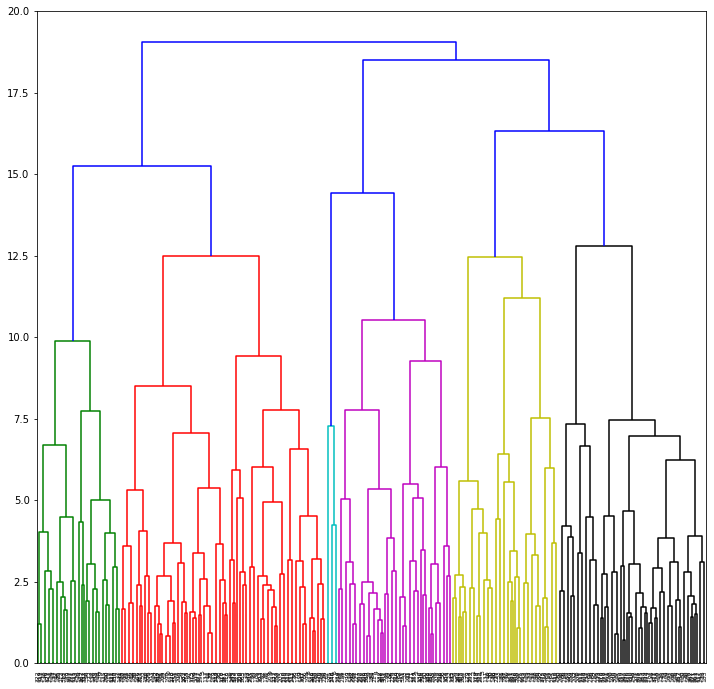

In [24]:
# grouping data based on ward distance

scaler = StandardScaler()

scaler.fit(trait_pca)

X_std_2 = scaler.transform(trait_pca)

X_std_2 = pd.DataFrame(X_std_2)

# Apply PCA
pca = PCA(n_components = 7)
pca.fit(X_std_2)

standard_mergings_ward = linkage(y = X_std_2,
                                  method = 'ward')

# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
# plt.savefig('standard_hierarchical_clust_ward.png')
plt.show()

Dendrogram is using the list of components pertaining to each personality type, we are summing the scores for each question in that category. Then we are creating a new column containing the aggregate score for that personality type.

Note: Based on the Dendrogram there are 6 clusters 

<h4> Calling the inertia plot function

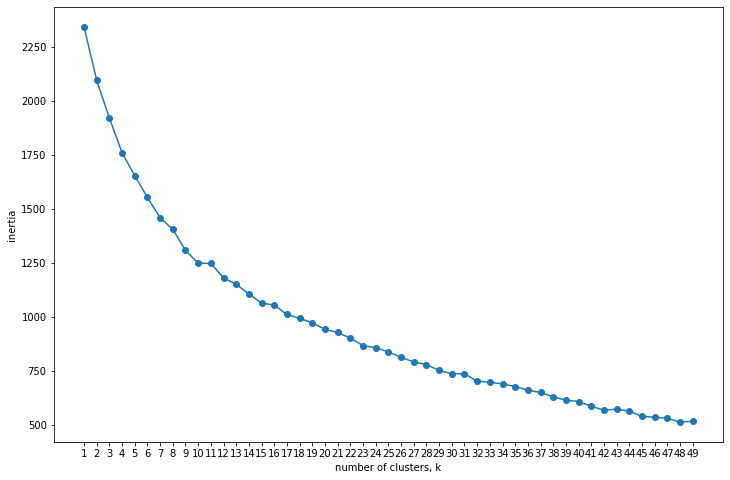

In [25]:
# calling the inertia_plot() function
interia_plot(data = X_std_2)

Note: The inertia point is similar to the scree plot but we have clusters instead of components on the x-axis. Inertia tells you how far away the points are in a cluster. The more clusters you have, the less distance the points are to their centroids.<br>
Accordingly, we decided to conduct further analysis using 4 clusters.

<h4> Defining the number of clusters

In [26]:
# definfing the number of clusters
traits_k_pca = KMeans(n_clusters = 4,
                         random_state = 802)


# fitting the object to the data
traits_k_pca.fit(X_std_2)


# converting the clusters to a DataFrame
traits_kmeans_pca = pd.DataFrame({'Cluster': traits_k_pca.labels_})


# checking the results
print(traits_kmeans_pca.iloc[: , 0].value_counts())

1    107
0    102
2     75
3     51
Name: Cluster, dtype: int64


This is the most practical output of K-means algorithm to our business situation: customer segmentation. The data has been divided into 4 segments based on similar characteristics and minimizing error.
Clusters 0 and 1 are the most dense clusters. 

Here we are calculating the means values of the centroids of each cluster and we are also labelling the components. 

<h4> Interpreting the centroids

We can see that Cluster 1 has higher concentration of  students who seem 'Anxious', Cluster 2  has more of 'Socialites', Cluster 3 has a very high concentration of 'Rapporteurs' and Cluster 4 houses more of 'Neuroticist thinkers'.

In [27]:
# centroids
centroids_pca = traits_k_pca.cluster_centers_

# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)

# renaming principal components
centroids_pca_df.columns = ['Anxious', 'Rapporteurs', 'Neuroticist thinkers', 'Socialite', 'Pace setter', 'Conscientious team player', 'Neuroticist']

# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Anxious,Rapporteurs,Neuroticist thinkers,Socialite,Pace setter,Conscientious team player,Neuroticist
0,0.87,-0.46,0.04,-0.03,-0.27,0.32,-0.35
1,-0.78,-0.51,-0.58,0.25,0.10,0.01,0.21
2,0.01,1.39,-0.02,0.08,-0.01,0.14,-0.16
3,-0.12,-0.06,1.19,-0.58,0.35,-0.86,0.49


<h4> Concatinating the demographics and PCA components

We are concatinating the demographic/other columns and PCA components into 1 DataFrame

In [28]:
# X_temp = pd.read_excel('Survey_Data_Final_Exam.xlsx')

clst_pca_df = pd.concat([traits_kmeans_pca,
                         trait_pca_7],
                         axis = 1)

# checking results
clst_pca_df


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([X_copy.loc[ : , 'What laptop do you currently have?' : 'Openness Score'],
                                 clst_pca_df],
                                 axis = 1)
# renaming columns
final_pca_clust_df.columns = ['What laptop do you currently have?', 
                                'What laptop would you buy in next assuming if all laptops cost the same?', 
                                'What program are you in?', 'What is your age?', 'Gender', 'What is your nationality? ',
                                'What is your ethnicity?', 'Extraversion Score', 'Agreeableness Score', 
                                'Conscientiousness Score', 'Neuroticism Score', 'Openness Score', 'Cluster', 
                                'Anxious', 'Rapporteurs', 'Neuroticist thinkers', 'Socialite', 'Pace setter', 'Conscientious team player', 'Neuroticist']


# # checking the results
print(final_pca_clust_df.head(n = 5))

  What laptop do you currently have? What laptop would you buy in next assuming if all laptops cost the same?          What program are you in?  What is your age?  Gender What is your nationality?  What is your ethnicity?  Extraversion Score  Agreeableness Score  Conscientiousness Score  Neuroticism Score  Openness Score  Cluster   Anxious  Rapporteurs  Neuroticist thinkers  Socialite  Pace setter  Conscientious team player  Neuroticist
0                            Macbook                                                                  Macbook     DD (MIB & Business Analytics)               25.0  Female                    ecuador       Hispanic / Latino                22.0                 19.0                     24.0               35.0            13.0      0.0  0.408972    -0.129001              0.169096  -1.304052    -0.771045                   1.441506    -0.061448
1                     Windows laptop                                                           Windows laptop       On

<h4> Final PCA cluster

In [41]:
#final_pca_clust_df

<h4> Renaming ownership and clusters, adding a productivity step

In [30]:
# renaming current/future laptop owenrship

laptop_names = {'Windows laptop' : 1,
                'Macbook' : 2,
                'MAC' : 2,
                'Chromebook' : 3}


final_pca_clust_df['What laptop do you currently have?'].replace(laptop_names, inplace = True)
final_pca_clust_df['What laptop would you buy in next assuming if all laptops cost the same?'].replace(laptop_names, inplace = True)

# renaming clusters
cluster_names = {0.0 : 'Cluster 1',
                 1.0 : 'Cluster 2',
                 2.0 : 'Cluster 3',
                 3.0 : 'Cluster 4'}


final_pca_clust_df['Cluster'].replace(cluster_names, inplace = True)


# adding a productivity step
data_df = final_pca_clust_df

data_df.columns = ['What laptop do you currently have?',
                   'What laptop would you buy in next assuming if all laptops cost the same?',
                   'What program are you in?', 'What is your age?','Gender','What is your nationality? ',
                   'What is your ethnicity?','Extraversion Score','Agreeableness Score','Conscientiousness Score',
                   'Neuroticism Score','Openness Score','Cluster', 'Anxious', 'Rapporteurs', 'Neuroticist thinkers', 'Socialite', 'Pace setter', 'Conscientious team player', 'Neuroticist']

# checking results
# data_df

<h4> Cleaning up the added columns

In [31]:
# Cleaning up the added columns

data_df.replace("indian", "india", inplace=True)
data_df.replace("indian.", "india", inplace=True)
data_df.replace("chinese", "china", inplace=True)
data_df.replace("canadian", "canada", inplace=True)
data_df.replace("mexican", "mexico", inplace=True)
data_df.replace("colombian", "colombia", inplace=True)
data_df.replace("brazilian", "brazil", inplace=True)
data_df.replace("russian", "russia", inplace=True)
data_df.replace("peruvian", "peru", inplace=True)
data_df.replace("taiwan( r.o.c)", "taiwan", inplace=True)
data_df.replace("nigerian", "nigeria", inplace=True)
data_df.replace("dominican republic", "dominican", inplace=True)
data_df.replace("american", "usa", inplace=True)
data_df.replace("indonesian", "indonesia", inplace=True)
data_df.replace("korean", "korea", inplace=True)
data_df.replace("south korea", "korea", inplace=True)
data_df.replace("thai", "thailand", inplace=True)
data_df.replace("filipino", "philippines", inplace=True)
data_df.replace("english", "british", inplace=True)
data_df.replace(".", "prefer not to answer", inplace=True)
data_df.replace("british, indian", "multi-ethnic", inplace=True)
data_df.replace("italian and spanish", "multi-ethnic", inplace=True)
data_df.replace("german/american", "multi-ethnic", inplace=True)
data_df.replace("caribbean-american", "multi-ethnic", inplace=True)
data_df.replace("french/ brazilian", "multi-ethnic", inplace=True)
data_df.replace("belgian", "belgium", inplace=True)
data_df.replace("belgian ", "belgium", inplace=True)
data_df.replace("filipino ", "philippines", inplace=True)
data_df.replace("calm", "prefer not to answer", inplace=True)

1 person - age 15. put buckets, designing questionnaire so such errors can be avoided
male and female - others
clean up ethnicity and nationality. maybe use a dropdown box and have others if it is not an exaustive list

<h4> Plotting Boxplots to understand the relationship among buying behavior and their personality traits among all clusters 

Plotting box plots to understand the relationship among buying behavior, personality traits and cluster to which a person belongs.

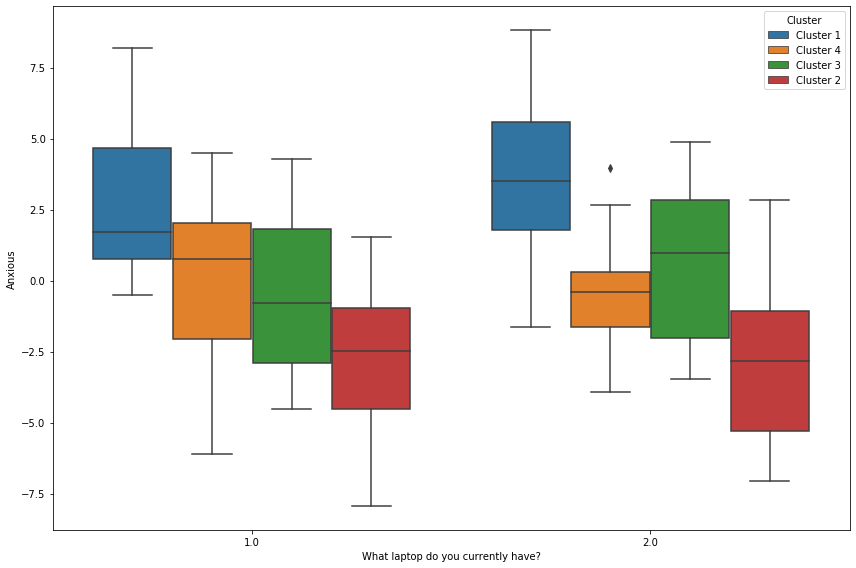

In [32]:
# Anxious people (C1) look for chromebooks

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop do you currently have?',
            y = 'Anxious',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

Note: Here we are plotting how each cluster is affected by the first component which includes anxiety variables. It's reasonable to assume that students who are more anxious worry more about their finances and thus cost is an important factor when making a purchasing decision. From this boxplot, the blue cluster (Cluster 1) is more cost conscious.

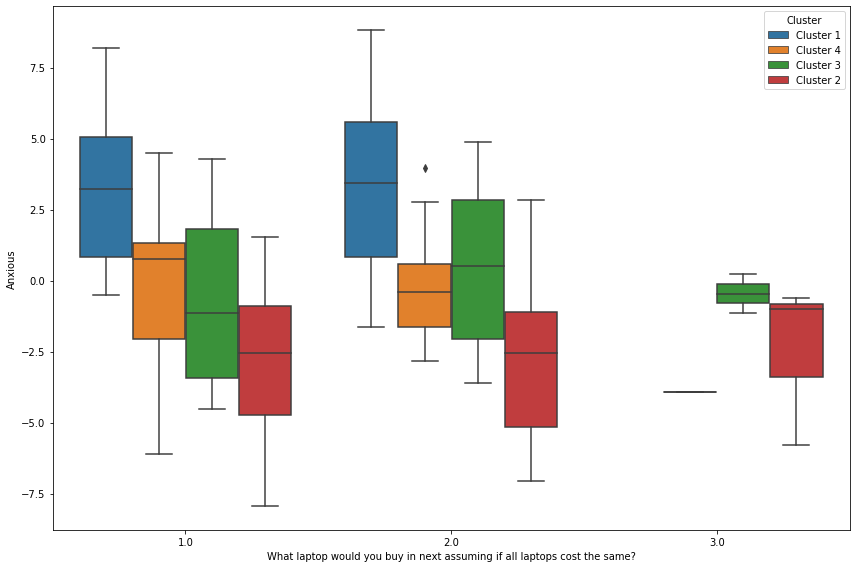

In [33]:
# Anxious people (C1) look for chromebooks

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Anxious',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

Note: This question "What Laptop would you buy next assuming if all laptops cost the same" help us determine how clusters who chose MAC vs PC feel for this component: "cost". Those who chose MAC as there next purchase have a higher mean for Cluster 1, confirming that they are more affected by cost.

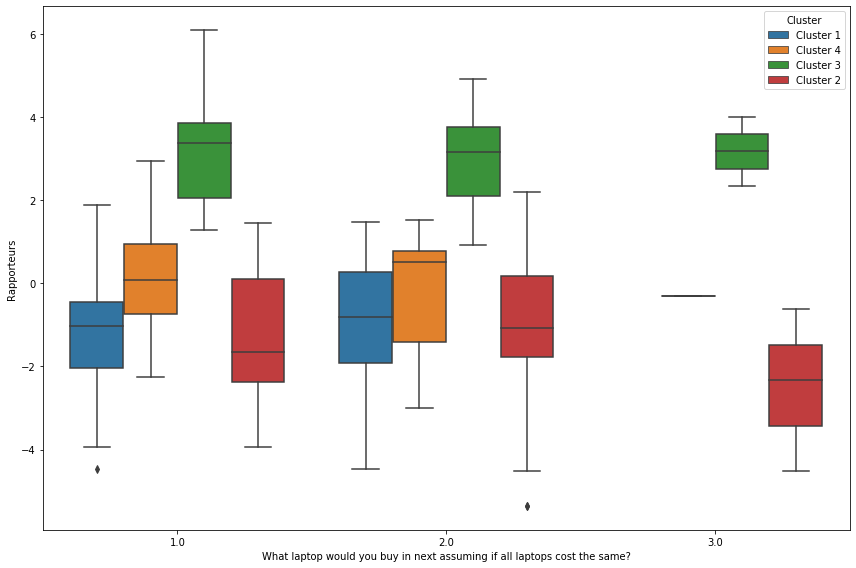

In [34]:
# Rapporteurs (C2) look for chromebooks

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Rapporteurs',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

Note: The second component (Rapporteurs) are high on "team building" skills, "receiving feedback", sharing ideas, negotiating and symphathizing with others. In this boxplot, Cluster 3 (green) seems to be most responsive to this component. This is because this includes people who have this persona, high teamwork skills. Those who want to switch to a Chromebook are also highly responsive to this component and this makes sense! Chromebooks are considerably cheap, have low features, can be used as a tablet. Some members of this cluster may want to switch to Chromebooks simply because they can use this laptop to surf the web (lightly), go on social media, read books and colloborate (as opposed to gaming, activities that demand high processing).

In [35]:
data_df['What laptop do you currently have?'].value_counts()

2.0    171
1.0    164
Name: What laptop do you currently have?, dtype: int64

In [36]:
data_df['What laptop would you buy in next assuming if all laptops cost the same?'].value_counts()

2.0    188
1.0    140
3.0      7
Name: What laptop would you buy in next assuming if all laptops cost the same?, dtype: int64

<h4> Finding out the willingness to change laptops

Creating a new column called switchers who seem to be willing to switch from thier current brand of laptop.

In [37]:
data_df['Switchers'] = data_df['What laptop do you currently have?'] - data_df['What laptop would you buy in next assuming if all laptops cost the same?']

In [38]:
data_df['Switchers'].value_counts()

 0.0    285
-1.0     33
 1.0     12
-2.0      5
Name: Switchers, dtype: int64

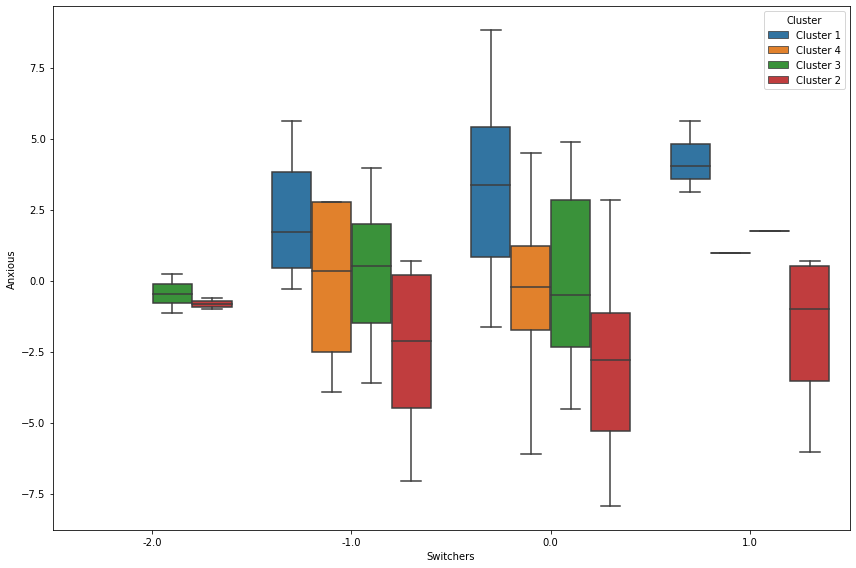

In [39]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Switchers',
            y = 'Anxious',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

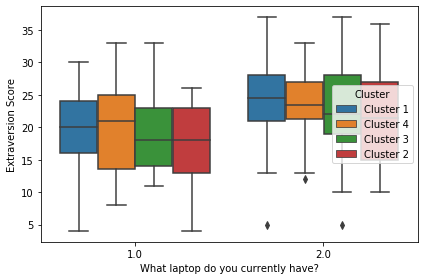

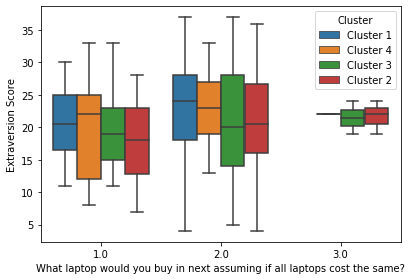

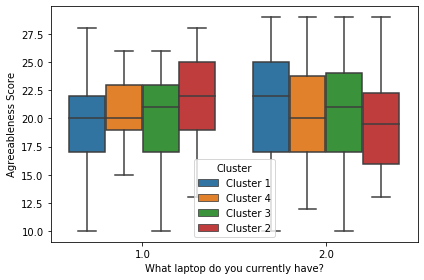

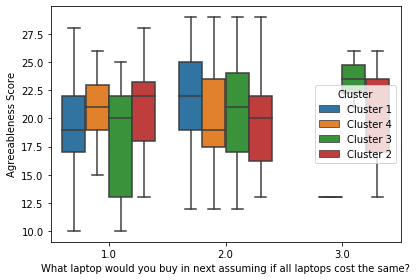

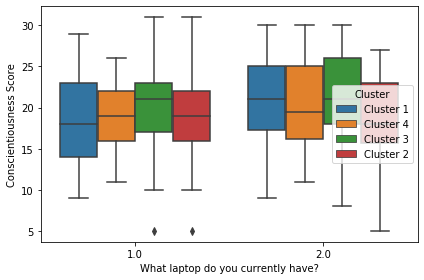

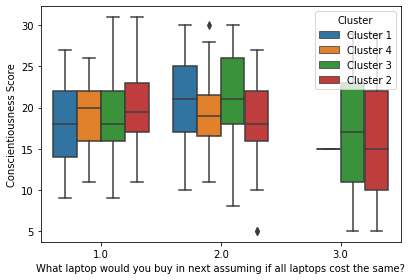

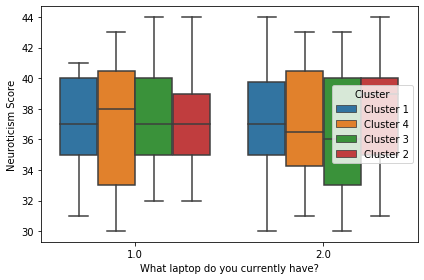

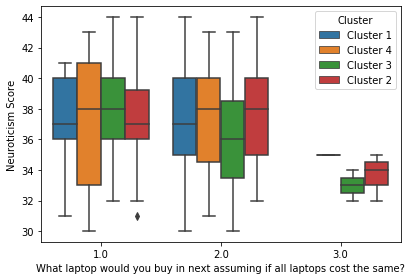

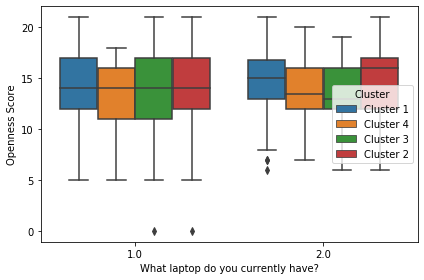

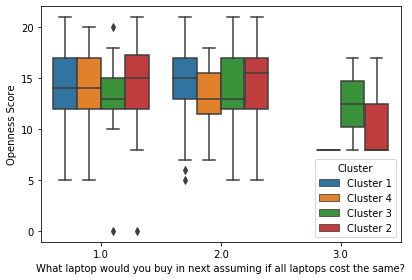

In [40]:
lst = ['Extraversion Score','Agreeableness Score','Conscientiousness Score','Neuroticism Score','Openness Score']
lst_2 = ['What laptop do you currently have?', 
         'What laptop would you buy in next assuming if all laptops cost the same?']
for i in lst :
    for a in lst_2 :
        sns.boxplot(y = data_df[i],
                    x = data_df[a],
                    hue = 'Cluster',
                    data = data_df)


        plt.tight_layout()
        plt.show()

    

***


<h3> Part IV: Conclusion </h3>

<center><u><b>Insights</b></u><br>
    <centre><br>
Based on PCA, anxiety variables (cost) are the most important factors to determine buying behavior. This is followed by teamwork variables as the second most important factor.
<centre><br>
    <br>
Based on K-Means Clustering, Cluster 4 responds most to anxiety variables and Cluster 3 responds most to teamwork variables. 
<centre><br>
    <br>
Microsoft should target Cluster 3 and 4 which is 38% of the market size.
The best way to appeal to the first market is to further reduce laptop price and maintain cost leadership. Secondly, to appeal to the market that values team work skills, Microsoft should enhance collaborative features in software and incentive team collaboration through free applications (skype, TeamViewer, Teams).

It is safe to conclude from the analysis that there is a strong relationship between the buying behavior and personality traits and Hult DNA characteristics. This study supports our Hypothesis. The companies should attempt to segment customers not only on their buying behavior but should also attempt to understand their personalities better. It is the latent personality traits that could be subconscious drivers of buying behavior. Understanding of these traits could help companies design products that are more suitable to customer wants and may also result in higher Return on Investment (ROI) on marketing.


***

~~~
 
                             _____ _                 _                        
                            |_   _| |               | |                       
                              | | | |__   __ _ _ __ | | __  _   _  ___  _   _ 
                              | | | '_ \ / _` | '_ \| |/ / | | | |/ _ \| | | |
                              | | | | | | (_| | | | |   <  | |_| | (_) | |_| |
                              \_/ |_| |_|\__,_|_| |_|_|\_\  \__, |\___/ \__,_|
                                                             __/ |            
                                                            |___/             

~~~


***